In [3]:
# Imports

# Ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Graphics and pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00', 'tomato']

# Machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load file with data
data = pd.read_csv('data/glass.csv')

# Get data headers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# Get the data ready for use
clean_data = data.copy()

# Rename the outcome column to glass type
#  Note: Two columns are the same INTENTIONALLY
clean_data['Type'] = clean_data['Type'].replace(
    {1: 'Building',
     2: 'Building',
     3: 'Vehicle',
     4: 'Vehicle',
     5: 'Container',
     6: 'Tableware',
     7: 'Headlamp'
    })

# Separate out classfiers from features
X = clean_data.copy().drop(columns=['Type'])
y = clean_data.copy()['Type']

# Normalize data
ss = StandardScaler()
ss.fit(X)
X[:] = ss.transform(X)

# Split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)


In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train,y_train)

print("Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))


Test Accuracy: 81.4%


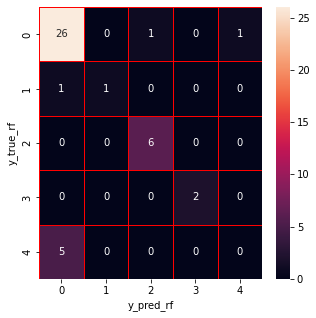

              precision    recall  f1-score   support

    Building       0.81      0.93      0.87        28
   Container       1.00      0.50      0.67         2
    Headlamp       0.86      1.00      0.92         6
   Tableware       1.00      1.00      1.00         2
     Vehicle       0.00      0.00      0.00         5

    accuracy                           0.81        43
   macro avg       0.73      0.69      0.69        43
weighted avg       0.74      0.81      0.77        43



In [19]:
import seaborn as sns

y_pred_rf = rf.predict(X_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

print(classification_report(y_test,y_pred_rf))

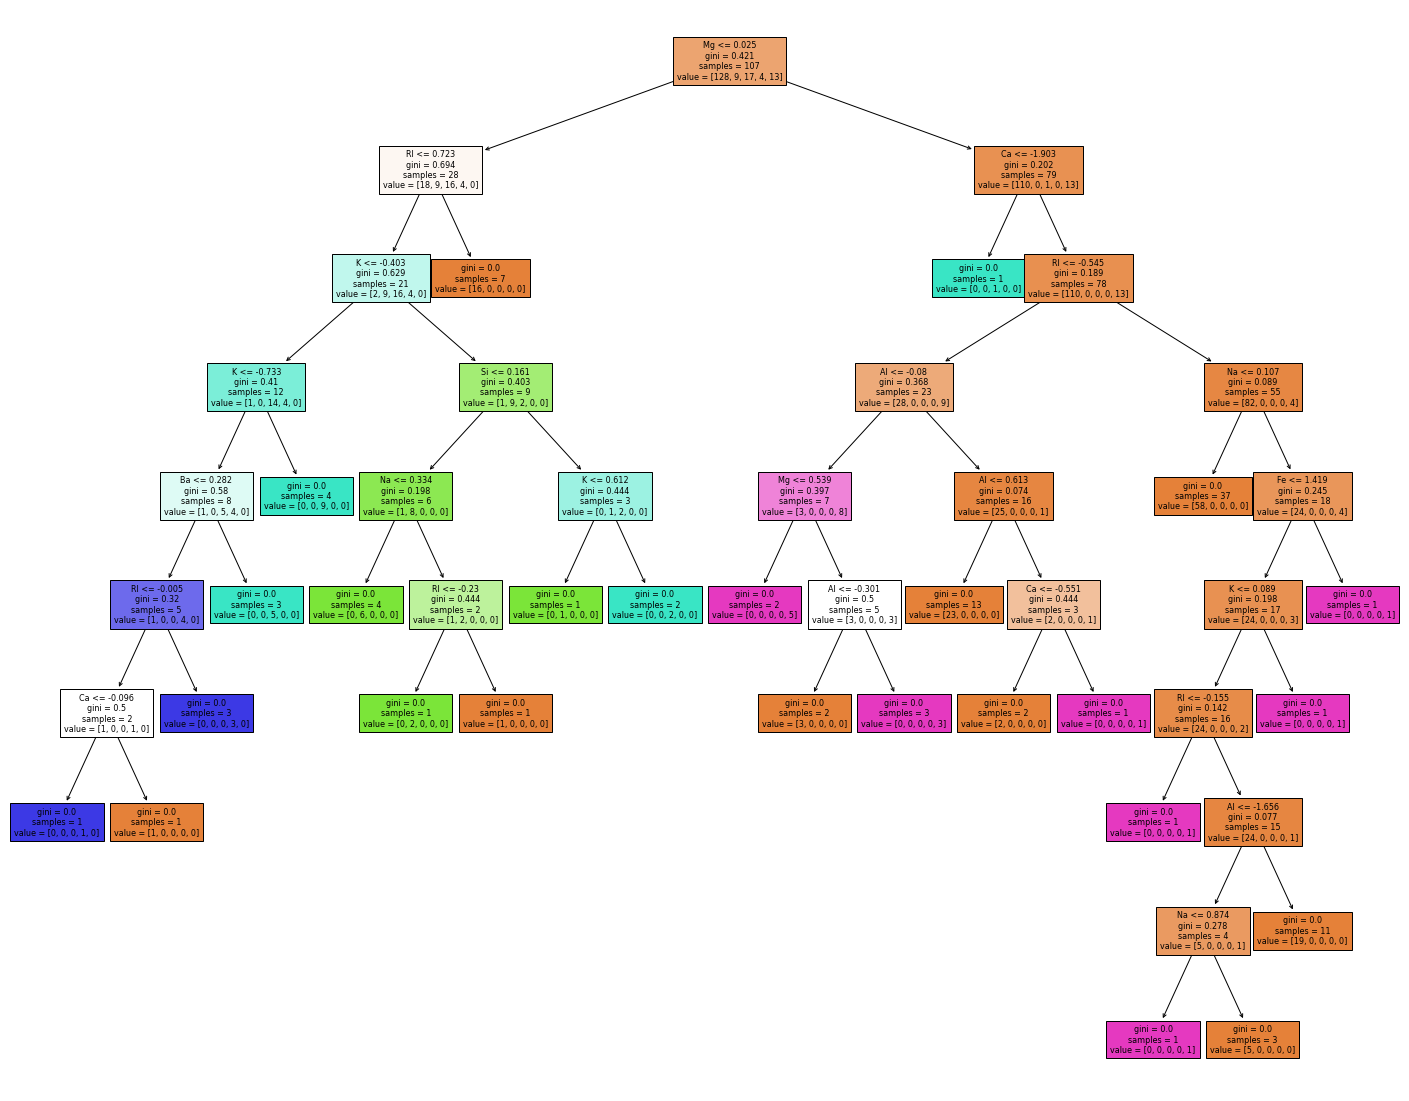

In [10]:
# create baseline decision tree to predict the type of glass based on the characteristics of the glass
from sklearn import tree
plt.figure(figsize=(25,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True, fontsize=8)

In [42]:
# classification decision tree access random tree in forest with estimators index
from sklearn import tree
from dtreeviz.trees import dtreeviz
viz = dtreeviz(rf.estimators_[0], X, y, feature_names=X.columns, target_name="Target")
viz

ValueError: y_data needs to consist only of numerical values. could not convert string to float: 'Building'

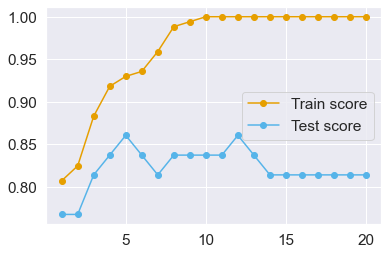

In [90]:
values=[i for i in range(1, 21)]
train_scores, test_scores=[], []

for i in values:
    rf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=i)
    rf.fit(X_train,y_train)
    
    Y_tr_pred=rf.predict(X_train)
    Y_te_pred=rf.predict(X_test)
    
    train_scores.append(accuracy_score(y_train, Y_tr_pred))
    test_scores.append(accuracy_score(y_test, Y_te_pred))

plt.plot(values, train_scores, '-o', color='#E69F00', label='Train score')
plt.plot(values, test_scores, '-o', color='#56B4E9', label='Test score')
plt.legend()
plt.show()

In [ ]:
# default is two splits but changing beyond this has an optimal amount before it 
# becomes an over fitting issue